# **Datos de inmuebles en bogota colombia**


##1.- **Objetivo** : Realizar un modelo de machine learnig para predecir el precio de los imnubles en bogota

##conexion de drive y colab

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


##Importar libreria panadas y traer el dataset

  

1.   Leer los datos
2.   Mostrar las primeras 5 filas




In [3]:
import pandas as pd


inmuebles= pd.read_csv("/content/drive/MyDrive/ciencia de datos/base de datos.csv")
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000




1.   Mostrar forma del data set




In [4]:
inmuebles.shape


(9520, 8)



1.   Comocer el nombre de la columnas




In [5]:
inmuebles.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

1. Se crea un diccionario y luego se renombran las columnas que tiene caracter especial

2. Tomar una muestra aleatoria de registros

In [6]:
columnas = {"Baños":"Banos","Área":"Area"}
inmuebles= inmuebles.rename(columns = columnas)
inmuebles.sample(10)


,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
5592,Casa,Casa en venta en Santa Barbara,1,2,58,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 419.600.000
4418,Casa,Casa en venta en Kennedy,4,2,220,Kennedy,Kennedy Central,$ 650.000.000
6063,Apartamento,Apartamento en venta en Zona Noroccidental,3,1,44,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 148.000.000
3116,Apartamento,Apartamento en venta en Santa Barbara,3,2,138,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 490.000.000
639,Apartamento,Apartamento en venta en Kennedy,2,2,55,Kennedy,Kennedy Central,$ 270.000.000
3227,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,36,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 142.000.000
4815,Apartamento,Apartamento en venta en Usaquén,3,3,71,Usaquén,Usaquén,$ 384.500.000
2833,Apartamento,Apartamento en venta en Kennedy,3,2,64,Kennedy,Kennedy Central,$ 285.000.000
5406,Apartamento,Apartamento en venta en Ciudadela Colsubsidio,2,1,50,Ciudadela Colsubsidio,Bolivia,$ 193.000.000
3629,Apartamento,Apartamento en venta en Bosa,3,1,48,Bosa,Bosa Central,$ 133.000.000



1. Conocer los tipos de varibles, verificar las columnas y ver si hay datos nulos

In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [7]:
# valores nulos de upz

inmuebles["UPZ"].isnull().sum()

42

## Realizacion de analis exploratorio (EDA) de los datos  

**iloc[numero del indice]**
1. iloc : para localizar indices del dataset

In [8]:
inmuebles.iloc[300]

Tipo                                Apartamento
Descripcion     Apartamento en venta en Kennedy
Habitaciones                                  2
Banos                                         1
Area                                         42
Barrio                                  Kennedy
UPZ                             Kennedy Central
Valor                             $ 116.100.000
Name: 300, dtype: object

In [9]:
inmuebles.iloc[300:305]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
300,Apartamento,Apartamento en venta en Kennedy,2,1,42,Kennedy,Kennedy Central,$ 116.100.000
301,Apartamento,Apartamento en venta en Chico Norte,2,2,95,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,$ 980.000.000
302,Apartamento,Apartamento en venta en Kennedy,3,2,54,Kennedy,Kennedy Central,$ 237.000.000
303,Apartamento,Apartamento en venta en Kennedy,3,2,67,Kennedy,Kennedy Central,$ 320.000.000
304,Apartamento,Apartamento en venta en Cedritos,4,4,132,Cedritos,Usaquén,$ 530.000.000


**devuelve unicamente el dato del valor**

In [ ]:
inmuebles["Valor"][300]

'$ 116.100.000'

In [ ]:
inmuebles["Valor"][300:305]

300    $ 116.100.000
301    $ 980.000.000
302    $ 237.000.000
303    $ 320.000.000
304    $ 530.000.000
Name: Valor, dtype: object

1. **Calcular el area promedio del conjunto de datos de inmuebles  de los datos analisados**

In [ ]:
#inmuebles.Area.mean()
inmuebles["Area"].mean()

146.66470588235293

**Mostrar una muestra de aleatoria de 100 datos para observar los datos**

In [10]:
inmuebles.sample(100)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
483,Apartamento,Apartamento en venta en Usaquén,3,2,82,Usaquén,Usaquén,$ 340.000.000
6468,Apartamento,Apartamento en venta en Santa Barbara,2,2,81,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000
3997,Apartamento,Apartamento en venta en Usaquén,2,2,81,Usaquén,Usaquén,$ 465.000.000
6900,Apartamento,Apartamento en venta en Cedritos,3,2,80,Cedritos,Usaquén,$ 330.000.000
4733,Apartamento,Apartamento en venta en Barrios Unidos,1,1,40,Barrios Unidos,Los Andes,$ 315.790.016
...,...,...,...,...,...,...,...,...
8825,Apartamento,Apartamento en venta en Portales Del Norte,3,2,74,Portales Del Norte,Britalia,$ 353.000.000
5499,Casa,Casa en venta en Santa Barbara,1,2,58,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 419.600.000
8306,Casa,Casa en venta en Bosa,3,2,132,Bosa,Bosa Central,$ 380.000.000
9272,Apartamento,Apartamento en venta en Usaquén,4,2,133,Usaquén,Usaquén,$ 750.000.000


**barrios que se encuentran en Chico Reservado**

In [11]:
inmuebles["Barrio"]== "Chico Reservado"

0       False
1       False
2        True
3       False
4       False
        ...  
9515    False
9516    False
9517    False
9518    False
9519    False
Name: Barrio, Length: 9520, dtype: bool

**Obtener la suma de inmubles que hay en el barrio chico reservado**

In [ ]:
sum((inmuebles.Barrio == "Chico Reservado"))


225

1.  **se crea una mascara de los inmuebles del barrio chico reservado**

In [12]:
inmuebles_chico = (inmuebles.Barrio == "Chico Reservado")
inmuebles_chico

0       False
1       False
2        True
3       False
4       False
        ...  
9515    False
9516    False
9517    False
9518    False
9519    False
Name: Barrio, Length: 9520, dtype: bool


***Se crea un dataframe con los vaores que esten en la barrio chico reservado***

In [14]:
chico_reservado = inmuebles[inmuebles_chico]
chico_reservado

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
39,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
72,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
126,Apartamento,Apartamento en venta en Chico Reservado,3,4,150,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.300.000.000
143,Apartamento,Apartamento en venta en Chico Reservado,2,4,104,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.100.000.000
...,...,...,...,...,...,...,...,...
9299,Apartamento,Apartamento en venta en Chico Reservado,3,3,148,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 780.000.000
9335,Apartamento,Apartamento en venta en Chico Reservado,3,3,176,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000
9341,Apartamento,Apartamento en venta en Chico Reservado,2,3,118,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 700.000.000
9472,Apartamento,Apartamento en venta en Chico Reservado,3,1,49,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 200.000.000


**Se Calcula el promedio de area en el barrio chico reservado**

In [15]:
chico_reservado.Area.mean()

142.78666666666666

In [16]:
#promedio del area de data set en general
inmuebles.Area.mean()

146.66470588235293

**Cantidad de barrios totales **

In [ ]:
#len muestra el conteo total de barrios
len(inmuebles["Barrio"].value_counts())

149

**Se muestra la cantidad de inmuebles por barrios**

In [17]:
inmuebles.Barrio.value_counts()


Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

In [18]:
len(inmuebles.UPZ.value_counts())


63

<Axes: >

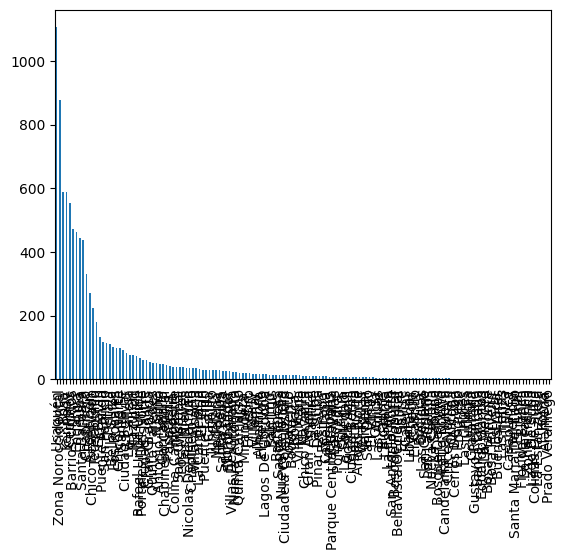

In [20]:
inmuebles_barrios = inmuebles.Barrio.value_counts()
inmuebles_barrios.plot.bar()

<Axes: >

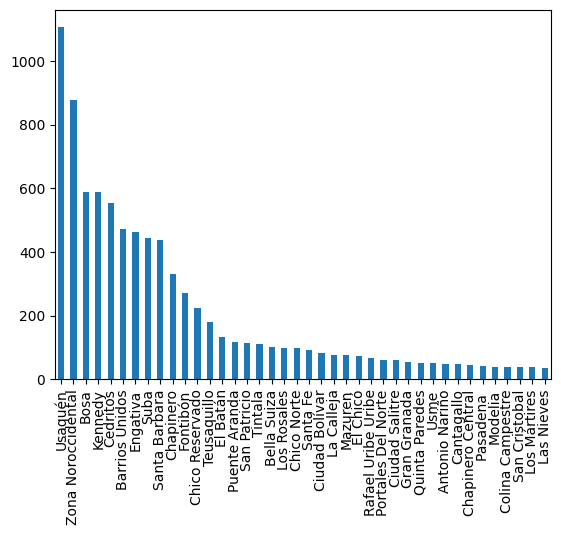

In [21]:
inmuebles_barrios.head(40).plot.bar()


**Grafico con el conteo de inmuebles a la venta en cada uno de los barrios**

<Axes: >

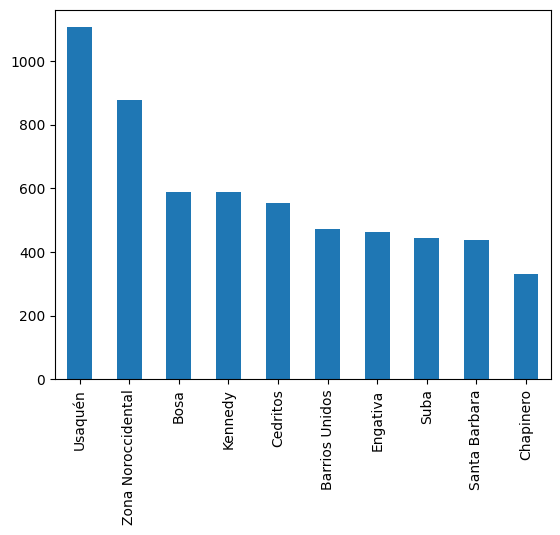

In [22]:
inmuebles_barrios.head(10).plot.bar()

1. Estadisticas para localizar algun patron, ver los valores atipicos del dataframe

In [23]:
# inmuebles.describe(include='all') include all trae todos los valores
inmuebles.describe()

,Habitaciones,Banos,Area
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


# ***calcular el valor del metro cuadrado***





In [ ]:
# sample() permite tomar una muestra
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
715,Casa,Casa en venta en Eduardo Santos,8,3,257,Eduardo Santos,Santa Isabel,$ 500.000.000
5233,Apartamento,Apartamento en venta en Usaquén,3,2,73,Usaquén,Usaquén,$ 310.000.000
5426,Apartamento,Apartamento en venta en Bosa,3,1,47,Bosa,Bosa Central,$ 125.000.000
4458,Apartamento,Apartamento en venta en Barrios Unidos,3,4,192,Barrios Unidos,Los Andes,$ 664.320.000
6939,Apartamento,Apartamento en venta en Suba,2,1,45,Suba,Suba,$ 182.000.000


In [24]:
#tipo de dato
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


**Tomar el primer valor**

In [26]:
print(type(inmuebles.Valor[0]))
inmuebles.Valor[0]

<class 'str'>


'$ 360.000.000'

 **Como el tipo de valor es string no se suma solo se concatena**

In [25]:
inmuebles.Valor[0]+ inmuebles.Valor[1]+inmuebles.Valor[:5]


0      $ 360.000.000$ 670.000.000$ 360.000.000
1      $ 360.000.000$ 670.000.000$ 670.000.000
2    $ 360.000.000$ 670.000.000$ 1.120.000.000
3      $ 360.000.000$ 670.000.000$ 890.000.000
4      $ 360.000.000$ 670.000.000$ 970.000.000
Name: Valor, dtype: object

**Se realiza un Split() para separar una cadena de  texto en funcion de algun parametro**

In [27]:
inmuebles.Valor[0].split()

['$', '360.000.000']

In [28]:
# str convierte todo a string  ya que por si solo es un panda series
#expand=True, se expandirá el resultado en un DataFrame, creando una nueva columna para cada elemento después de la división.
valor=inmuebles.Valor.str.split(expand=True) #se crea un dataframe con dos colunas [0]=$ y [1]=valor
inmuebles["Moneda"] = valor[0] #tomo la primera columna del dataframe
inmuebles["Precio"] = valor[1] #tomo la segunda columna del dataframe
inmuebles.sample(3)


,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
8158,Casa,Casa en venta en Tunjuelito,5,3,192,Tunjuelito,Tunjuelito,$ 420.000.000,$,420.000.000
859,Apartamento,Apartamento en venta en Usme,3,1,52,Usme,USME: Alfonso López + Ciudad Usme,$ 190.000.000,$,190.000.000
7125,Apartamento,Apartamento en venta en Rafael Uribe Uribe,2,2,63,Rafael Uribe Uribe,Los Alcázares,$ 380.000.000,$,380.000.000


In [29]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


**se transforma la columna precio con la funcion replace se quita el punto y se le coloca nada**

In [30]:
# replace remplaza el valor el primer parametro es lo que se va a remplazar y el segungo es por que se va a remplazar
inmuebles["Precio"]=inmuebles["Precio"].str.replace(".","",regex=True)   #regex=True indica que el primer argumento es un patrón de expresión regular.

In [31]:
inmuebles[["Precio","Barrio"]]   #[[]] se usa el doble corchete ya que es como si se pasara una lista

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


**tranformamos el dato a numerico, se crea una nueva columna**

In [32]:
#Precio_million  se crea la nueva variable
#astype para cambiar el tipo de dato
inmuebles["Precio_million"] = inmuebles.Precio.astype("float")/1000000 # se convierte en tipo float y se divide por 1 millon
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tipo            9520 non-null   object 
 1   Descripcion     9520 non-null   object 
 2   Habitaciones    9520 non-null   int64  
 3   Banos           9520 non-null   int64  
 4   Area            9520 non-null   int64  
 5   Barrio          9520 non-null   object 
 6   UPZ             9478 non-null   object 
 7   Valor           9520 non-null   object 
 8   Moneda          9520 non-null   object 
 9   Precio          9520 non-null   object 
 10  Precio_million  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


***Valores estadisticos con describe***

In [33]:
#describe da valores estadisticos basicos
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_million
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [34]:
# set_option ("display.precision", indicar el valor de la precision )  indica una precision de 2 con dos desimales
pd.set_option("display.precision",2)
pd.set_option("display.float_format",lambda x:"%.2f" % x) # %.2f % indica el porcentaje
#def format_float(x):
 #   return "%.2f" % x   funcion sustituida por lamba
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_million
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


**loc[  ]** Permite localizar los atributos que cumplan con la condicion

Ver que inmueble cunta con 110 habitaciones

In [35]:
# se busca el imnueble que sale con 100 habitaciones
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_million
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


**localizar que imnueble tiene un area de 2 mts**

In [36]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_million
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


**crear un histrograma de la columna precio_millon**

**bins** Es la separacion de los rangos de bloques que se visualizan en el eje x,mientras mas bins mas barras se crean

Histograma para enterder el valor de la frecuencia de una variable

<Axes: ylabel='Frequency'>

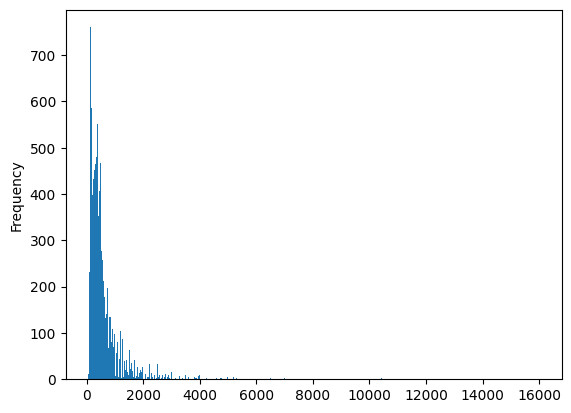

In [37]:
inmuebles["Precio_million"].plot.hist(bins=500)

### importar libreria matplotlin y seaborn

librerias importantes seaborn,matplotlib



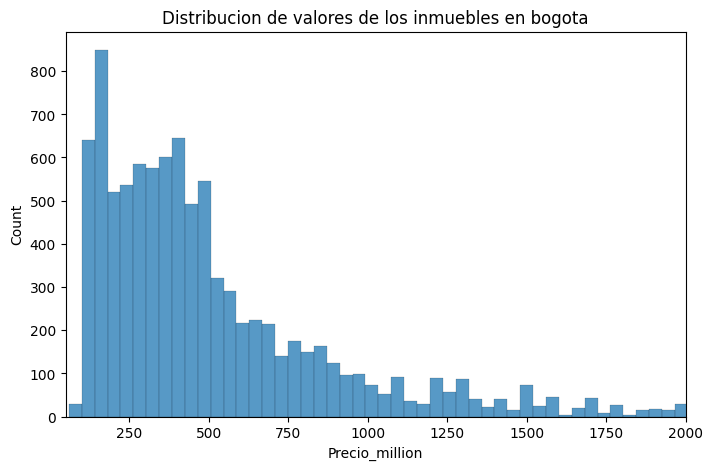

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
grafica = sns.histplot(data=inmuebles, x='Precio_million')
grafica.set_title("Distribucion de valores de los inmuebles en bogota")
plt.xlim((50,2000))
plt.show()


###Se crea la grafica entre los 50 millones y 1000 millones

´´´´´
comentarios del codigo
´´´´´´

```
# plt.figure(figsize=(10,6)) /// se crea el tamaño de la grafica lienzo
grafica = sns.histplot(data=inmuebles, x='Precio_million',kde = True, hub='tipo') // `**kde** muestra la curva de densidad, hub añade otra dimension al grafico
grafica.set_title("Distribucion de valores de los inmuebles en bogota") //titulo de la grafica
plt.xlim((50,1000)) //limita el limite de los datos ,Se crea la grafica entre los 50 millones y 1000 millones
plt.ylim((0,20)) //limita los valores en y
plt.show() //muestra la grafica
```



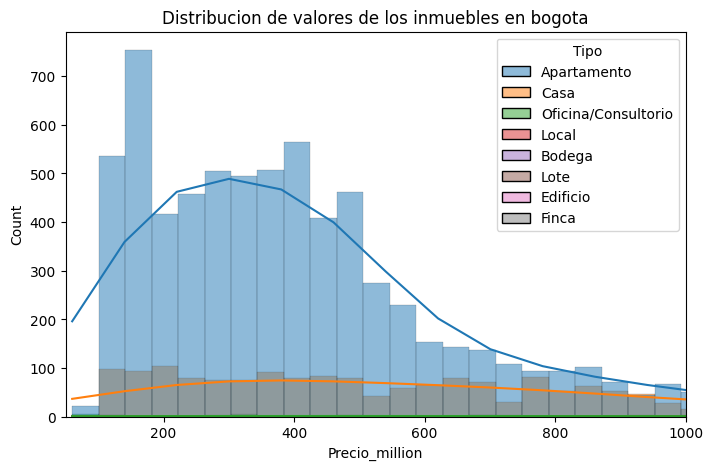

In [40]:
plt.figure(figsize=(8,5))
grafica = sns.histplot(data=inmuebles, x='Precio_million',kde = True,hue='Tipo')
grafica.set_title("Distribucion de valores de los inmuebles en bogota")
plt.xlim((50,1000))
#plt.ylim((0,5))
plt.savefig("/content/drive/MyDrive/ciencia de datos/inmuebles_bogota.png",format='png')
plt.show()

**se creea una mueva columna y se divide el precio entre el area**

In [41]:
# valor de metro cuadrado en millones
inmuebles["valor_m2_million"]=inmuebles["Precio_million"]/inmuebles["Area"]
inmuebles.head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_million,valor_m2_million
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78


**se agrupan los barrios y se calcula el promedio**

In [42]:
# promedio de todas las columnas numericas
inmuebles.groupby("Barrio").mean()

<ipython-input-42-2933eb7108b2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inmuebles.groupby("Barrio").mean()


,Habitaciones,Banos,Area,Precio_million,valor_m2_million
Barrio,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42
...,...,...,...,...,...
Villa Maria,4.69,3.69,207.15,402.85,2.04
Villas De Granada,3.45,2.32,86.59,282.30,3.17
Villemar,2.94,2.06,76.89,303.83,3.99


***agrupar por barrio se toma los datos por barrio y se suman todos los atributos***

In [43]:
datos_barrio=inmuebles.groupby("Barrio").sum()
datos_barrio

<ipython-input-43-ba0f5534b581>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_barrio=inmuebles.groupby("Barrio").sum()


,Habitaciones,Banos,Area,Precio_million,valor_m2_million
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,73.56
Andes Norte,21,20,874,4967.00,42.35
Antonio Nariño,207,120,7827,22042.65,169.47
Barrancas,43,32,1053,4712.00,66.24
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58
Villas De Granada,76,51,1905,6210.62,69.71
Villemar,53,37,1384,5469.00,71.81


In [44]:
datos_barrio["valor_m2_Barrio"] = datos_barrio["Precio_million"]/datos_barrio["Area"]
datos_barrio

,Habitaciones,Banos,Area,Precio_million,valor_m2_million,valor_m2_Barrio
Barrio,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


**diccionario de barrio**

In [45]:
m2_barrio=dict(datos_barrio["valor_m2_Barrio"])

In [46]:
inmuebles["valor_m2_Barrio"]=inmuebles["Barrio"]
inmuebles["valor_m2_Barrio"]=inmuebles["valor_m2_Barrio"].map(m2_barrio)
inmuebles.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_million,valor_m2_million,valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58,6.29


**seleccionar los principales barrios para analizar**

In [47]:
#los barrios que tienen mas ventas top 10
top_barrios=inmuebles["Barrio"].value_counts()[:10].index


In [48]:
datos_barrio.reset_index(inplace=True)
datos_barrio

,Barrio,Habitaciones,Banos,Area,Precio_million,valor_m2_million,valor_m2_Barrio
0,Alameda,3,2,97,580.00,5.98,5.98
1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,Villemar,53,37,1384,5469.00,71.81,3.95
147,Zona Franca,2,1,54,160.00,2.96,2.96


In [49]:
datos_barrio.query("Barrio in @top_barrios")

,Barrio,Habitaciones,Banos,Area,Precio_million,valor_m2_million,valor_m2_Barrio
5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


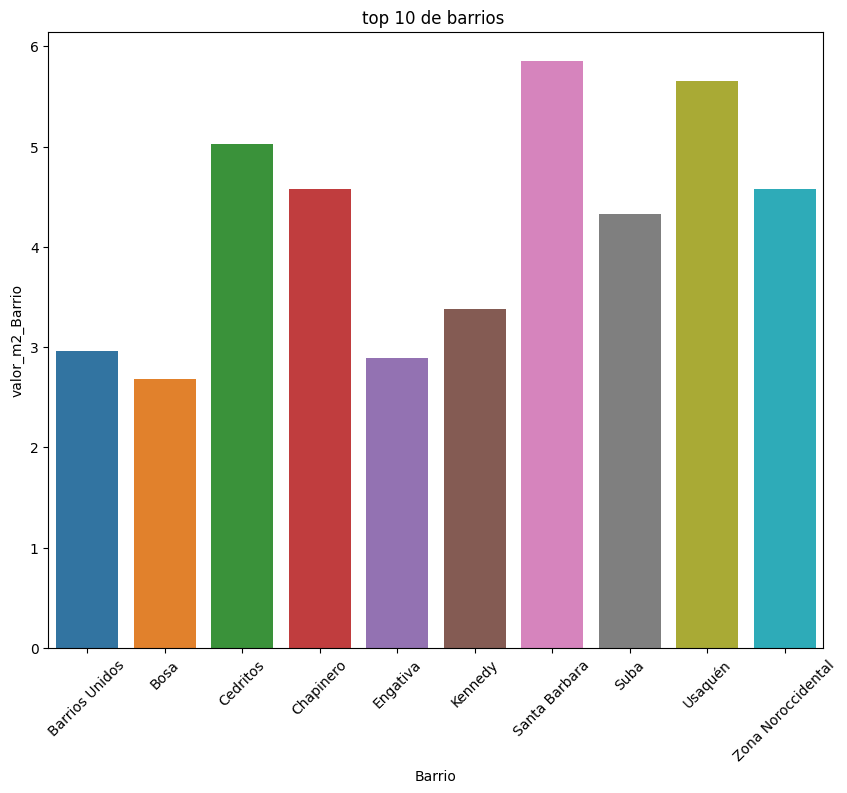

In [50]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x="Barrio",y="valor_m2_Barrio", data=datos_barrio.query("Barrio in @top_barrios"))
ax.tick_params(axis="x",rotation=45)
ax=plt.title("top 10 de barrios ")


Se crea un grfico de cajas para ver precio de los barrios y valor en m2

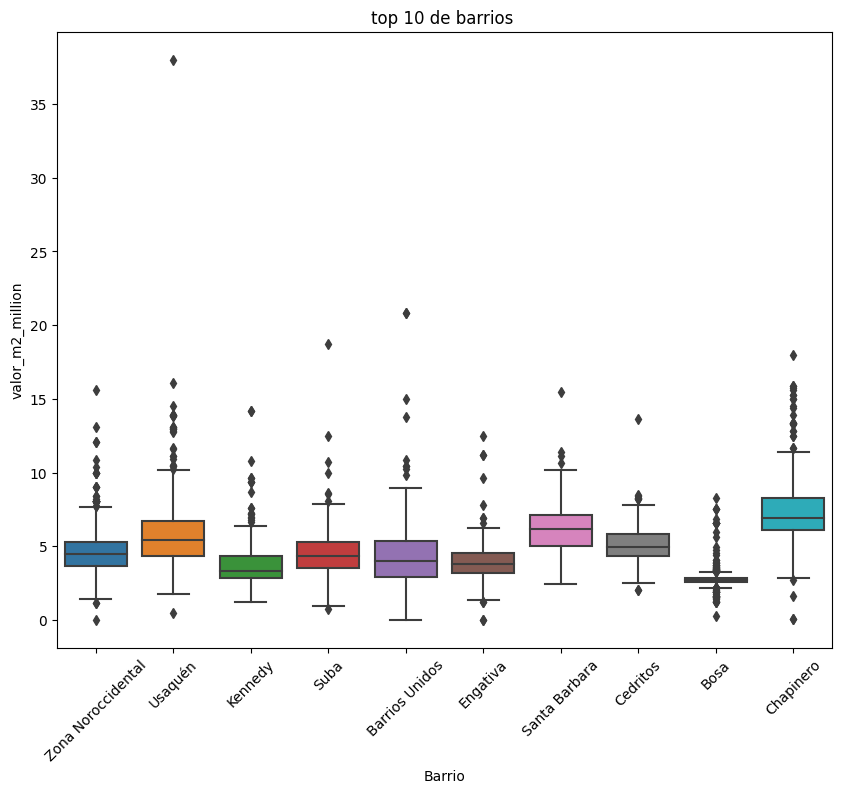

In [51]:
#diagrama de cajas
plt.figure(figsize=(10,8))
ax=sns.boxplot(x="Barrio",y="valor_m2_million", data=inmuebles.query("Barrio in @top_barrios"))
ax.tick_params(axis="x",rotation=45)
ax=plt.title("top 10 de barrios ")
plt.show()

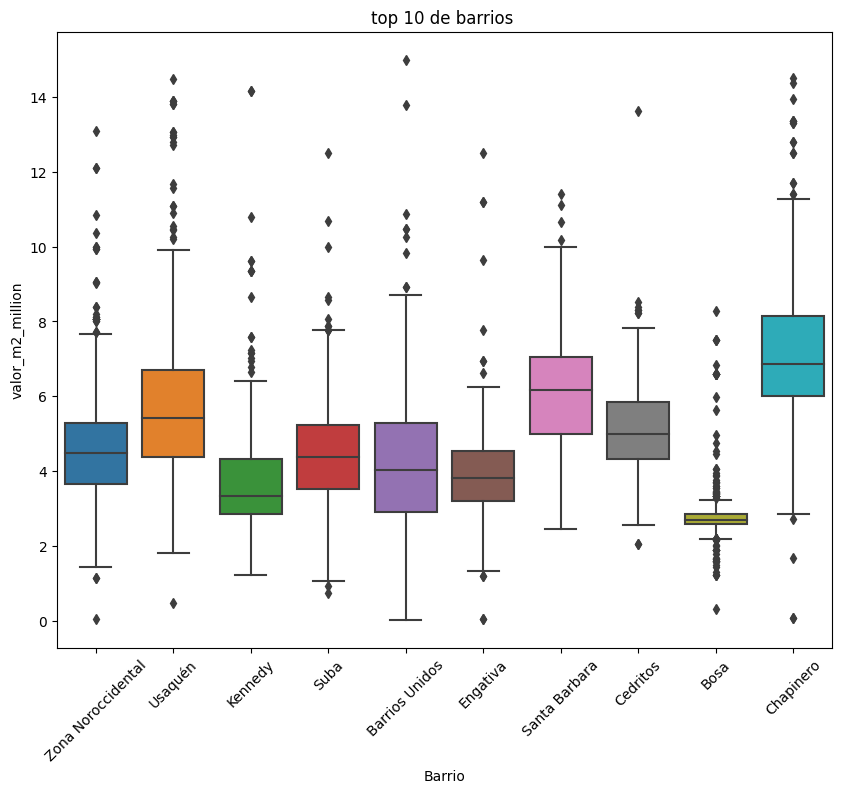

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x="Barrio",y="valor_m2_million", data=inmuebles.query("Barrio in @top_barrios & valor_m2_million < 15"))
ax.tick_params(axis="x",rotation=45)
ax=plt.title("top 10 de barrios ")
plt.show()

Verificar el area de los barrios

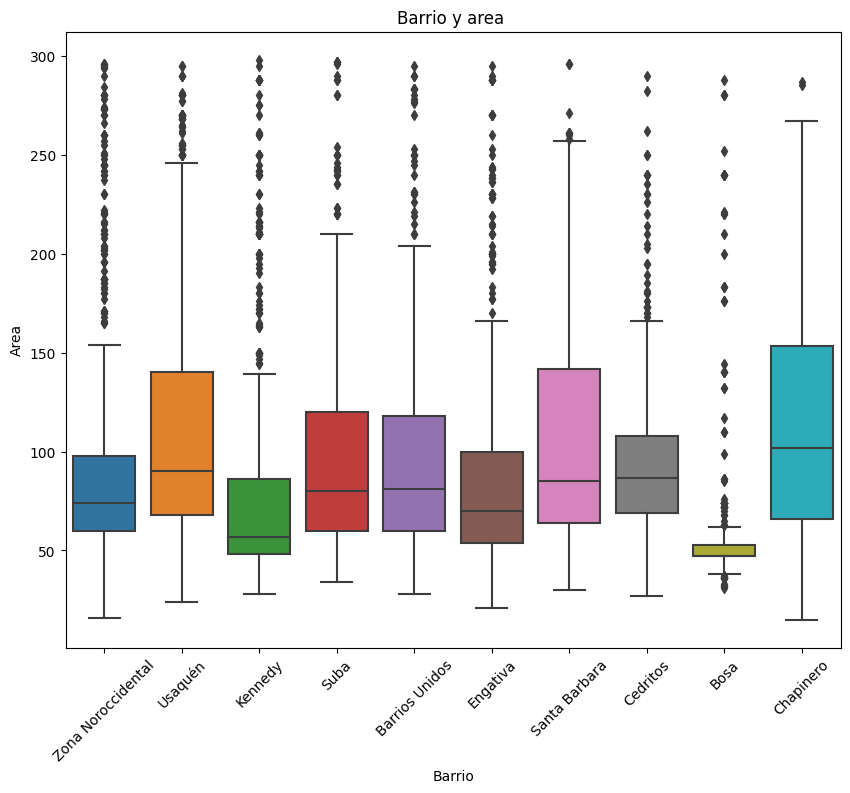

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x="Barrio",y="Area", data=inmuebles.query("Barrio in @top_barrios & Area <300"))
ax.tick_params(axis="x",rotation=45)
ax=plt.title("Barrio y area ")
plt.show()

**ver precio por metro cuadrado**

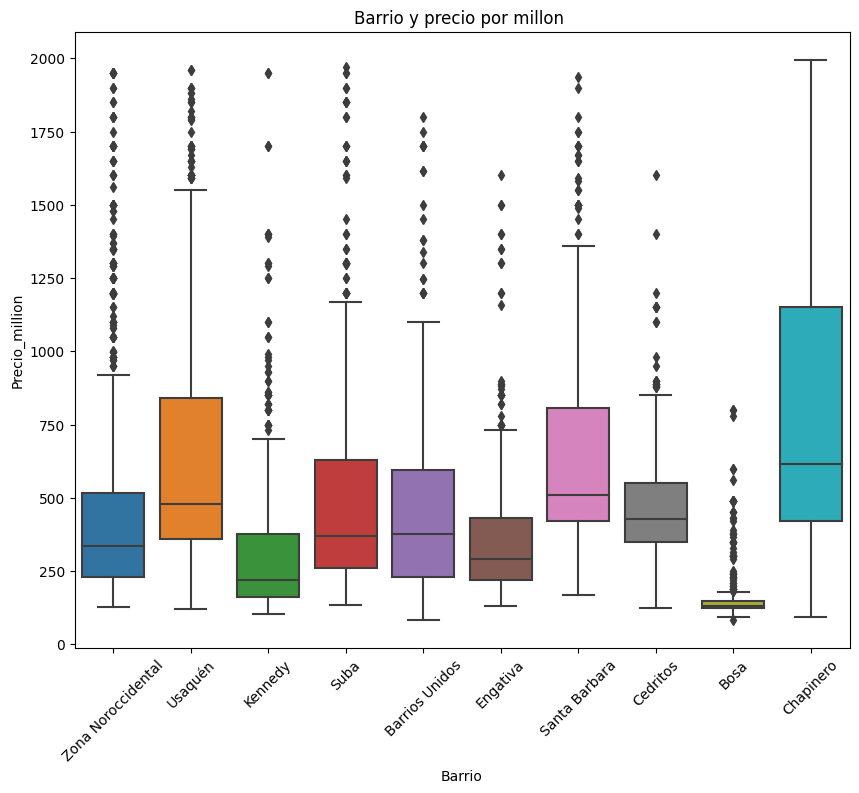

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x="Barrio",y="Precio_million", data=inmuebles.query("Barrio in @top_barrios & Precio_million <2000"))
ax.tick_params(axis="x",rotation=45)
ax=plt.title("Barrio y precio por millon ")
plt.show()

Vamos a traer datos estadísticos de la ciudad de Bogotá, directamente del DANE y vamos a ver como estos datos nos ayudarían en inclusión de nuevas variables para el cálculo del precio de los inmuebles en la ciudad de Bogotá.

Encuesta Multiproposito de Bogotá para obtener información socio-económica y de entorno urbano de los habitantes de Bogotá para la formulación, seguimiento y evaluación de las políticas distritales.

https://microdatos.dane.gov.co/index.php/catalog/743

In [ ]:
# encoding="latin-1"  : es el codigo en el cual esta configurado el dataset
# sep ";" para separar los datos
datos_raw=pd.read_csv("/content/drive/MyDrive/ciencia de datos/Identificación (Capítulo A).csv", sep=";", encoding="latin-1")
datos_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [ ]:
# ver como esta esta conformado el datset
datos_raw.shape

(106467, 11)

In [ ]:
# extraer solo los daros que sean del municipio 11001
datos_raw= datos_raw.loc[datos_raw["MPIO"]==11001]
datos_raw.shape

(86504, 11)

In [ ]:
datos_b=pd.read_csv("/content/drive/MyDrive/ciencia de datos/Datos de la vivenda y su entorno (Capítulo B).csv", sep=";", encoding="latin-1")
datos_c=pd.read_csv("/content/drive/MyDrive/ciencia de datos/Condiciones habitacionales del hogar (Capítulo C).csv", sep=";", encoding="latin-1")
datos_e=pd.read_csv("/content/drive/MyDrive/ciencia de datos/Composición del hogar y demografía (Capítulo E).csv", sep=";", encoding="latin-1")
datos_h=pd.read_csv("/content/drive/MyDrive/ciencia de datos/Educación (Capítulo H).csv", sep=";", encoding="latin-1")
datos_l=pd.read_csv("/content/drive/MyDrive/ciencia de datos/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv", sep=";", encoding="latin-1")
datos_k=pd.read_csv("/content/drive/MyDrive/ciencia de datos/Fuerza de trabajo (Capítulo K).csv", sep=";", encoding="latin-1")


<ipython-input-60-c6bebd9099bb>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c=pd.read_csv("/content/drive/MyDrive/ciencia de datos/Condiciones habitacionales del hogar (Capítulo C).csv", sep=";", encoding="latin-1")
<ipython-input-60-c6bebd9099bb>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e=pd.read_csv("/content/drive/MyDrive/ciencia de datos/Composición del hogar y demografía (Capítulo E).csv", sep=";", encoding="latin-1")
<ipython-input-60-c6bebd9099bb>:4: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h=pd.read_csv("/content/drive/MyDrive/ciencia de datos/Educación (Capítulo H).csv", sep=";", encoding="latin-1")
<ipython-input-60-c6bebd9099bb>:5: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on import or set low_memory=False.
  

La función pd.merge se utiliza para combinar dos DataFrames en función de una o más columnas, similar a la operación de unión en SQL

In [ ]:
datos_dane =  pd.merge(datos_raw,datos_b, on="DIRECTORIO", how="left")
datos_dane.shape

(86504, 73)

In [ ]:
datos_dane=pd.merge(datos_dane,datos_c, on="DIRECTORIO", how="left")
datos_dane.shape

(87061, 214)

In [ ]:
datos_dane=pd.merge(datos_dane,datos_e, on="DIRECTORIO", how="left")
datos_dane.shape

<ipython-input-63-c98aa227571f>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane=pd.merge(datos_dane,datos_e, on="DIRECTORIO", how="left")


(238559, 281)

In [ ]:
# traer la tabla datos dane
datos_dane=pd.read_csv("/content/drive/MyDrive/ciencia de datos/datos_dane.csv")
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.00,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,3004369.00,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,3004375.00,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,3004380.00,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,3004383.00,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


In [ ]:
#numeros de filas y de columnas
datos_dane.shape

(9857, 55)

In [ ]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


In [ ]:
# se renombra las columnas para hacer las legible la tabla
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO',
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES',
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES',
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA',
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19',
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA',
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO',
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA',
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO',
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO',
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [ ]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

In [ ]:
datos_dane.isna().sum()

DIRECTORIO                      0
NOMBRE_LOCALIDAD                0
NOMBRE_ESTRATO                  0
CONJUNTO_CERRADO                0
FABRICAS_CERCA                  0
TERMINALES_BUS                  0
BARES_DISCO                     0
OSCURO_PELIGROSO                0
RUIDO                           0
INSEGURIDAD                     0
BASURA_INADECUADA               0
INVASION                        0
MOV_ADULTOS_MAYORES             0
MOV_NINOS_BEBES                 0
OCUPACION                       0
CONTRATO                        0
SALARIO_MES                   299
DONDE_TRABAJA                   0
DECLARACION_RENTA               0
VALOR_DECLARACION             299
PERDIDA_TRABAJO_C19             0
PERDIDA_INGRESOS_C19            0
TIENE_ESCRITURA                 0
ANO_COMPRA                      0
VALOR_COMPRA                  299
HIPOTECA_CRED_BANCO          8423
OTRO_CRED_BANCO              8423
CRED_FNA                     8423
PRESTAMOS_AMIGOS             8423
CESANTIAS     

In [ ]:
#agrupar por el nombre de la columna (NOMBRE_ESTRATO) que es la upz (UNIDADES DE PLANEAMIENTO ZONAL)
# calcular el promedio
datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head(20)

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.89,1.19,1.85,1.89,1.56,1.84,1493859.61,1.16,1.92,1.68,1.80
Américas,1.38,1.25,1.98,1.79,1.61,1.92,2672138.14,1.06,1.97,1.72,1.85
Apogeo,1.65,1.30,1.75,1.94,1.68,2.00,1837583.18,1.08,1.92,1.65,1.92
Arborizadora,1.43,1.30,1.95,1.88,1.69,1.84,1802296.76,1.03,1.88,1.61,1.82
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.37,1.33,1.99,1.98,1.70,1.87,2943730.73,1.05,1.95,1.70,1.94
Bolivia,1.03,1.77,1.97,1.98,1.86,1.90,2796224.06,1.11,1.95,1.75,1.92
Bosa Central,1.74,1.06,1.79,1.81,1.29,1.76,900869.48,1.18,1.90,1.58,1.84
Bosa Occidental,1.73,1.21,1.97,1.94,1.36,1.87,1074930.29,1.04,1.91,1.61,1.97
Boyacá Real,1.54,1.27,1.93,1.91,1.53,1.91,2828340.23,1.04,1.99,1.65,1.88


In [ ]:
#  se replaza el 2 por 0
# se crea variable dato para almacenar los datos cambiados
datos=datos_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos.head(10)

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.00,1.00,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.00,1.00,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.00,1.00,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.00,1.00,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.00,1.00,0,1,1
5,Usaquén,1,0,0,0,0,0,6000000.00,1.00,0,0,0
6,CHAPINERO: Pardo Rubio + Chapinero,1,0,0,0,0,0,5200000.00,1.00,0,0,0
7,CHAPINERO: Chicó Lago + El Refugio,1,0,0,0,0,0,99.00,1.00,1,1,0
8,Ciudad Salitre Occidental,1,0,0,0,0,0,3500000.00,1.00,0,0,0
9,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,1400000.00,1.00,0,1,0


In [ ]:
datos.loc[datos.NOMBRE_ESTRATO == "20 de Julio"]

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
513,20 de Julio,0,0,0,0,1,0,98.00,1.00,0,1,0
706,20 de Julio,0,1,0,0,1,0,908000.00,1.00,0,0,1
707,20 de Julio,0,1,0,0,1,0,1800000.00,1.00,0,0,0
708,20 de Julio,0,1,0,0,1,0,1200000.00,1.00,0,0,0
709,20 de Julio,0,1,0,1,1,0,2000000.00,1.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,20 de Julio,0,1,0,0,0,1,400000.00,1.00,1,1,1
8751,20 de Julio,0,0,0,0,0,0,906000.00,1.00,0,0,1
8752,20 de Julio,0,1,0,0,0,1,1200000.00,1.00,0,0,0
8783,20 de Julio,0,1,1,0,0,0,1200000.00,1.00,0,0,1


In [ ]:
#
datos_tratados=datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.90,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
Venecia,0.47,0.82,0.24,0.29,0.50,0.36,2078712.71,0.83,0.14,0.40,0.25
Verbenal,0.77,0.56,0.08,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09


In [ ]:
# se hace el merge para unir las tablas
# left_on porque los nombres son distintos
# se unio atravez del upz
pd.merge(inmuebles,datos_tratados, left_on="UPZ",right_on="NOMBRE_ESTRATO", how="left")

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.52,0.01,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,0.58,0.12,0.11,0.34,0.13,2794784.29,0.94,0.09,0.30,0.18
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,0.22,0.00,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,0.42,0.00,0.02,0.27,0.01,4832842.64,0.96,0.02,0.16,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,...,0.61,0.03,0.17,0.43,0.09,2144185.60,0.91,0.07,0.26,0.19
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,...,0.49,0.02,0.15,0.42,0.09,4177178.77,0.93,0.02,0.12,0.07
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,...,0.71,0.03,0.17,0.47,0.26,2356994.56,0.90,0.05,0.22,0.21
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,...,0.87,0.02,0.11,0.54,0.13,1418652.63,0.85,0.02,0.39,0.07


In [ ]:
# se guardo los datos
datos_ml=pd.merge(inmuebles,datos_tratados, left_on="UPZ",right_on="NOMBRE_ESTRATO", how="left")
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9520 non-null   object 
 1   Descripcion               9520 non-null   object 
 2   Habitaciones              9520 non-null   int64  
 3   Banos                     9520 non-null   int64  
 4   Area                      9520 non-null   int64  
 5   Barrio                    9520 non-null   object 
 6   UPZ                       9478 non-null   object 
 7   Valor                     9520 non-null   object 
 8   Moneda                    9520 non-null   object 
 9   Precio                    9520 non-null   object 
 10  Precio_million            9520 non-null   float64
 11  valor_m2_million          9520 non-null   float64
 12  valor_m2_Barrio           9520 non-null   float64
 13  CONJUNTO_CERRADO          9366 non-null   float64
 14  INSEGURI

In [ ]:
# se extrajo los datos del upz ya que ahi esta el codigo numerico
# se realizo un merge con un iner join para hacer la interseccion de hambos upz
upz = pd.read_csv("/content/drive/MyDrive/ciencia de datos/cod_upz.csv")
datos_ml=pd.merge(datos_ml,upz,left_on="UPZ",right_on="NOMBRE_ESTRATO", how="inner")
datos_ml.head(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
5,Casa,Casa en venta en Zona Noroccidental,3,5,365,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.799.000.000,$,2799000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
6,Casa,Casa en venta en Zona Noroccidental,5,5,450,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.450.000.000,$,1450000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
7,Casa,Casa en venta en Zona Noroccidental,4,5,315,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.000.000.000,$,2000000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
8,Casa,Casa en venta en Zona Noroccidental,4,6,423,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.800.000.000,$,1800000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
9,Casa,Casa en venta en Zona Noroccidental,5,2,200,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 580.000.000,$,580000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00


In [ ]:
datos_ml.shape

(9318, 26)

In [ ]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banos                     9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   Moneda                    9318 non-null   object 
 9   Precio                    9318 non-null   object 
 10  Precio_million            9318 non-null   float64
 11  valor_m2_million          9318 non-null   float64
 12  valor_m2_Barrio           9318 non-null   float64
 13  CONJUNTO_CERRADO          9318 non-null   float64
 14  INSEGURI

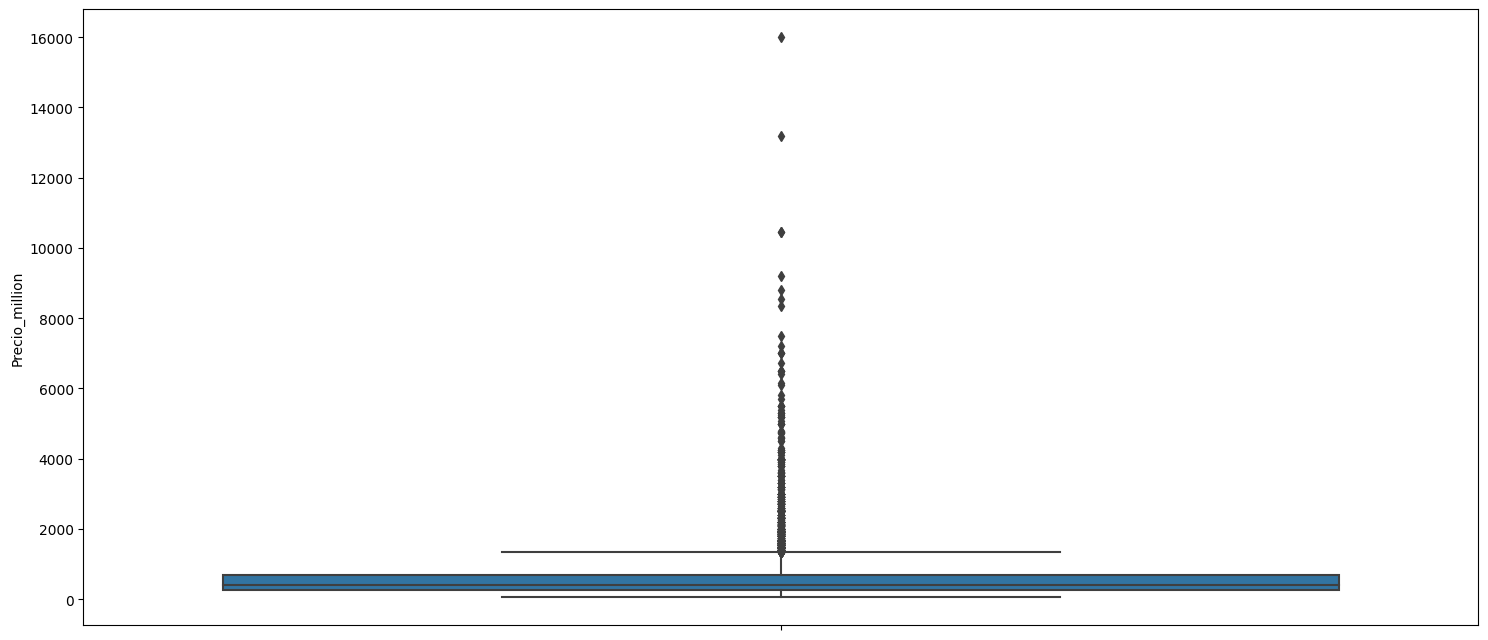

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(datos_ml,y="Precio_million")
plt.show()

In [ ]:
datos_ml.query("Precio_million >5000  | Precio_million< 60")

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
207,Apartamento,Apartamento en venta en Chapinero,3,5,476,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 8.550.000.000,$,8550000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
323,Local,Local en venta en Chapinero,16,9,650,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.800.000.000,$,5800000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
702,Casa,Casa en venta en Chapinero,4,4,462,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.200.000.000,$,5200000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
708,Casa,Casa en venta en Chapinero,12,2,769,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 6.160.000.000,$,6160000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
829,Apartamento,Apartamento en venta en Zona Noroccidental,4,7,550,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 7.200.000.000,$,7200000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1371,Apartamento,Apartamento en venta en El Chicó,4,5,555,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 6.100.000.000,$,6100000000,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1414,Apartamento,Apartamento en venta en El Chicó,3,5,1550,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 13.200.000.000,$,13200000000,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1429,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1442,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1518,Apartamento,Apartamento en venta en Chico Reservado,4,5,378,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 6.500.000.000,$,6500000000,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00


In [ ]:
#precio millon tiene que ser menor a 5mil millones y mayor a 60
datos_ml=datos_ml.query("Precio_million <1000  & Precio_million > 60")
datos_ml

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
9,Casa,Casa en venta en Zona Noroccidental,5,2,200,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 580.000.000,$,580000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
10,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 278.000.000,$,278000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00


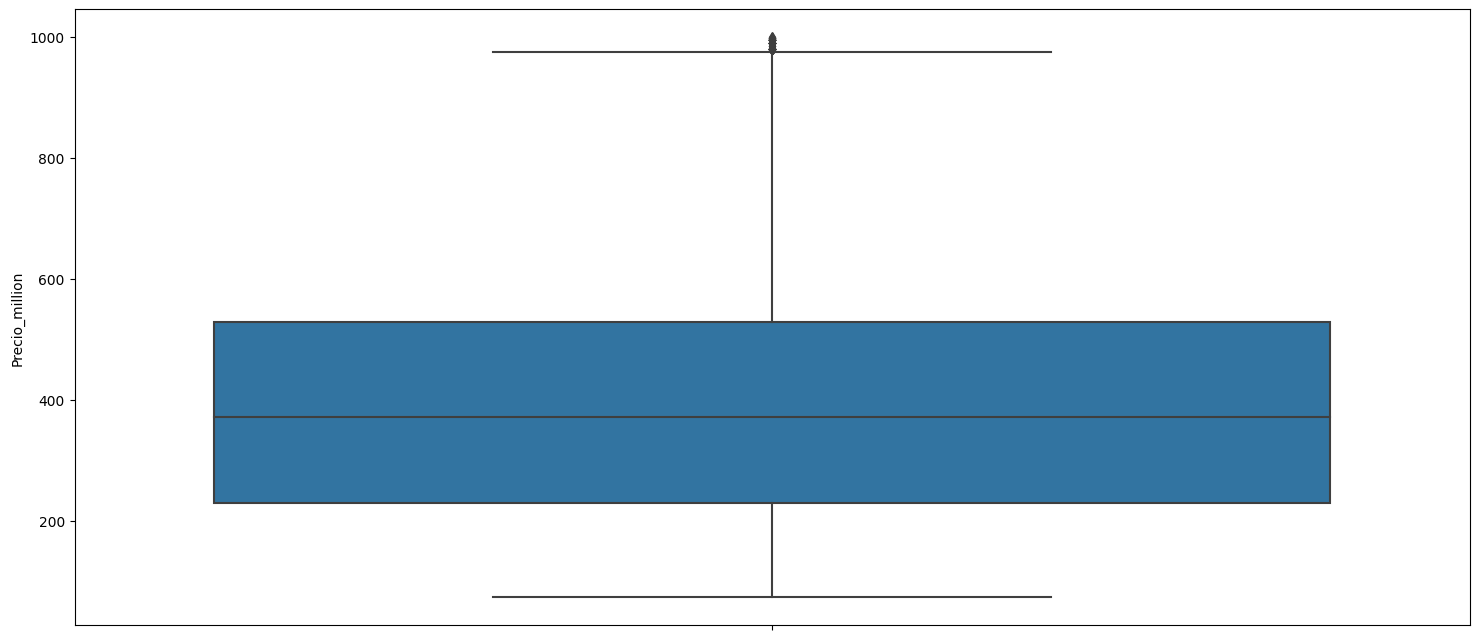

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(datos_ml,y="Precio_million")
plt.show()

In [ ]:
#se creo una nueva columna para almacenar el salario por año
datos_ml["SALARIO_ANUAL_MI"]=datos_ml["SALARIO_MES"]*12/1000000
datos_ml["SALARIO_ANUAL_MI"]

0      48.42
1      48.42
3      48.42
9      48.42
10     48.42
        ... 
9313   29.34
9314   29.34
9315   29.34
9316   29.34
9317   29.34
Name: SALARIO_ANUAL_MI, Length: 8053, dtype: float64

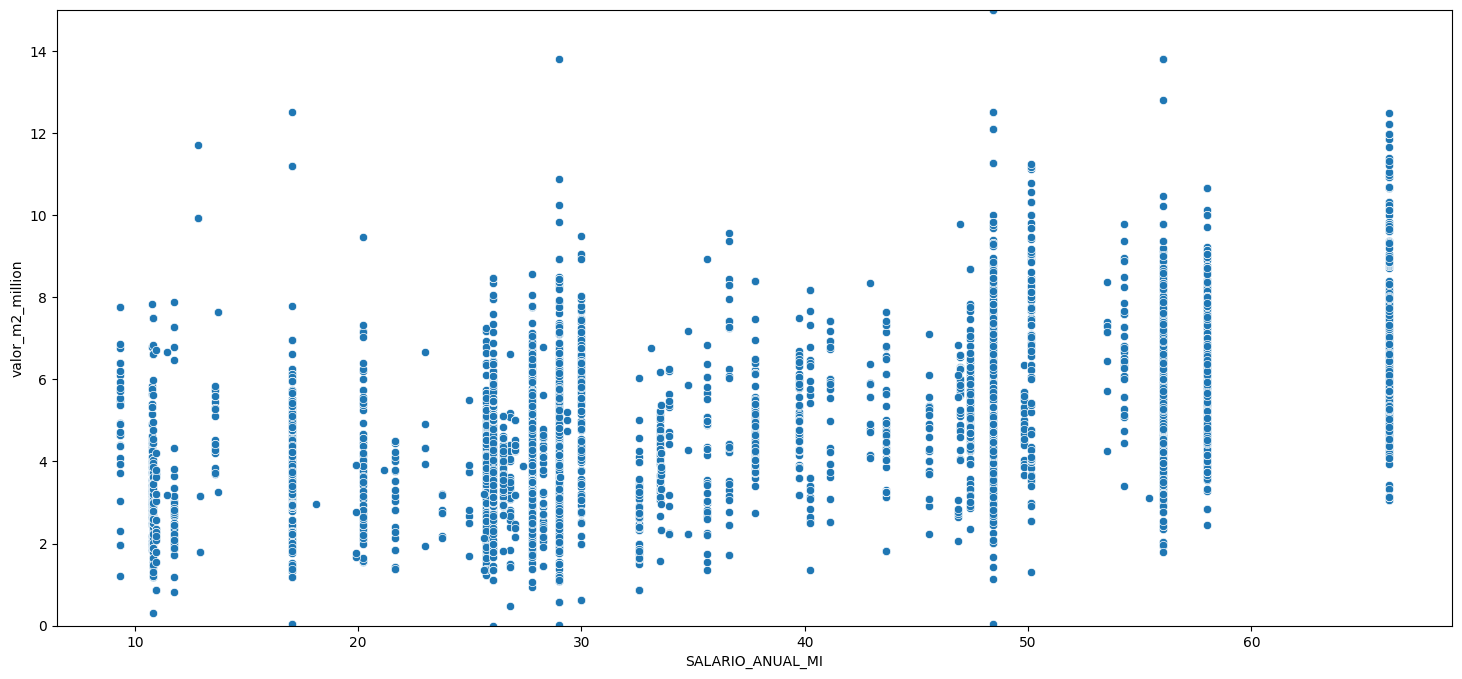

In [ ]:
#ver la relacion entre salario en millones y valor de metro 2 del inmuble
plt.figure(figsize=(18, 8))
sns.scatterplot(datos_ml, x="SALARIO_ANUAL_MI", y="valor_m2_million")
plt.ylim((0,15))
plt.show()

In [ ]:
# mapa de correlacion para los datos  correlacion como se relacionan las variablees entre si
#se combinan las variables entre ellas para ver como se relacionan
#mientras el valor sea mas cercano a uno quiere decir que los valores se correlacionan  mas
# 0 no existe correlacion
datos_ml.corr()

<ipython-input-86-1c15ecf83910>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos_ml.corr()


,Habitaciones,Banos,Area,Precio_million,valor_m2_million,valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Habitaciones,1.00,0.44,0.02,0.18,-0.31,-0.21,-0.12,0.13,0.08,0.10,0.14,0.12,-0.18,-0.08,0.07,0.13,0.10,-0.12,-0.18
Banos,0.44,1.00,0.03,0.66,-0.04,0.12,0.15,-0.18,-0.17,-0.11,-0.16,-0.21,0.17,0.12,-0.09,-0.15,-0.07,0.00,0.17
Area,0.02,0.03,1.00,0.04,-0.04,-0.04,-0.01,-0.00,-0.01,-0.01,-0.00,0.01,-0.01,-0.01,0.02,0.01,0.01,-0.01,-0.01
Precio_million,0.18,0.66,0.04,1.00,0.35,0.41,0.32,-0.38,-0.30,-0.24,-0.35,-0.39,0.42,0.22,-0.18,-0.33,-0.18,0.15,0.42
valor_m2_million,-0.31,-0.04,-0.04,0.35,1.00,0.48,0.32,-0.36,-0.29,-0.22,-0.36,-0.35,0.45,0.23,-0.20,-0.36,-0.21,0.25,0.45
valor_m2_Barrio,-0.21,0.12,-0.04,0.41,0.48,1.00,0.66,-0.66,-0.38,-0.41,-0.66,-0.60,0.82,0.42,-0.32,-0.65,-0.22,0.41,0.82
CONJUNTO_CERRADO,-0.12,0.15,-0.01,0.32,0.32,0.66,1.00,-0.84,-0.31,-0.50,-0.70,-0.66,0.81,0.61,-0.34,-0.78,0.06,0.08,0.81
INSEGURIDAD,0.13,-0.18,-0.00,-0.38,-0.36,-0.66,-0.84,1.00,0.52,0.60,0.85,0.75,-0.82,-0.56,0.29,0.74,0.08,0.00,-0.82
TERMINALES_BUS,0.08,-0.17,-0.01,-0.30,-0.29,-0.38,-0.31,0.52,1.00,0.40,0.68,0.58,-0.52,-0.31,0.18,0.37,0.26,-0.09,-0.52
BARES_DISCO,0.10,-0.11,-0.01,-0.24,-0.22,-0.41,-0.50,0.60,0.40,1.00,0.60,0.49,-0.38,-0.26,-0.02,0.32,-0.06,0.27,-0.38


<ipython-input-87-61a27c17377a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


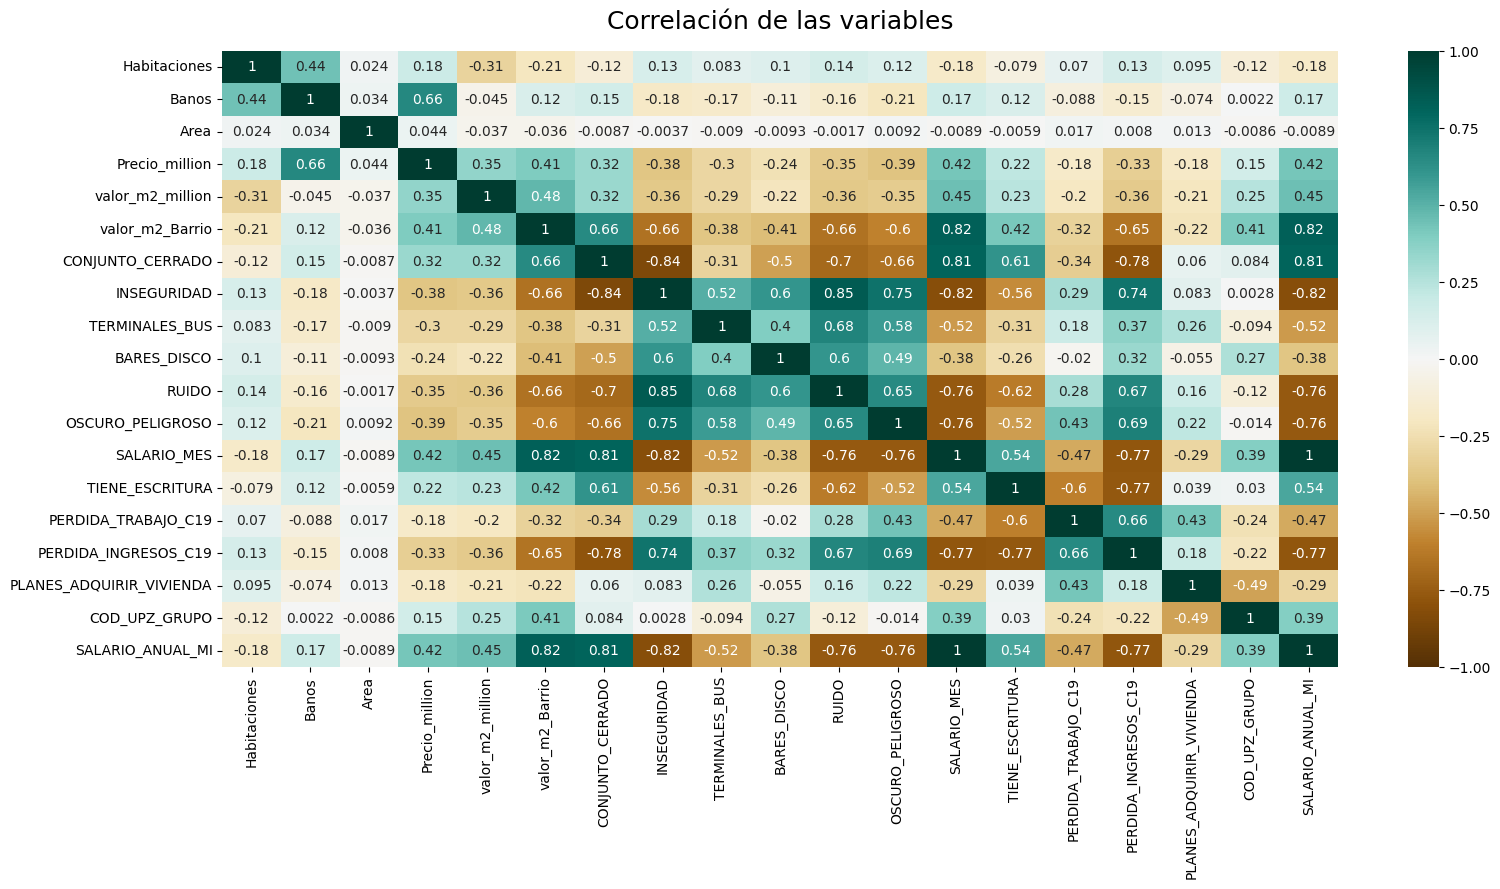

In [ ]:
# generarl mapa de calor del datset para ver la correlaciones
# en el mappa se muestra la correlacion entre las variables
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);


\##  **Creacion modelo de machine learning**

In [ ]:
 # importar lobreria para machine learnig
from sklearn.linear_model import LinearRegression  #paquete de regresion lineal
from sklearn.model_selection import train_test_split # paquete de prueba

X = datos_ml[['COD_UPZ_GRUPO']]
y=datos_ml['Precio_million']

#como la respuesta de la operacion devuelve 4 varibles se hace lo soguiente para cada respuesta
# test_size= indica que entrenar con el 75 % de los datos pero se va a probar con el 25% de los datos
# toma el 75% para entrenar y deja el 25% para prueba
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
X_train

,COD_UPZ_GRUPO
2304,14.00
8090,85.00
5393,27.00
1611,817.00
4177,803.00
...,...
6304,74.00
6472,74.00
1101,816.00
8839,102.00


In [ ]:
X_test

,COD_UPZ_GRUPO
3464,14.00
7429,24.00
2633,14.00
7028,75.00
4206,803.00
...,...
6548,74.00
3807,803.00
4822,47.00
1337,802.00


In [ ]:
y_train

2304   800.00
8090   489.00
5393   275.00
1611   750.00
4177   320.00
        ...  
6304   240.00
6472   280.00
1101   420.00
8839   290.00
8472   800.00
Name: Precio_million, Length: 6039, dtype: float64

In [ ]:
y_test

3464   630.00
7429   390.00
2633   550.00
7028   790.00
4206   440.00
        ...  
6548   154.00
3807   580.00
4822   125.00
1337   222.00
811    375.00
Name: Precio_million, Length: 2014, dtype: float64

In [ ]:
# se instancial el modelo
modelo=LinearRegression()

In [ ]:
# se hace el ajuste del modelo con la x de entrenamiento y la y de entrenamiento
modelo.fit(X_train,y_train)  # aqui el modelo ya esta entrenado

LinearRegression()

In [ ]:
# predecir el modelo
# va a predecir con los daros de prueba de X para predecir y
y_predict=modelo.predict(X_test)

In [ ]:
# error absoluto medio
# r^2
from sklearn.metrics import mean_absolute_error, r2_score
baseline_mae=mean_absolute_error(y_test,y_predict)
baseline_r2=r2_score(y_test,y_predict)

# el error absoluto medio dice que si introduciomos el valor de un imnueble va a tener una variacion de


In [ ]:
print(f"el error absoluto medio dice que si introduciomos el valor de un imnueble va a tener una variacion de {baseline_mae} millones de pesos")
print(f"R^2 al cuadrado es  {baseline_r2} ")

el error absoluto medio dice que si introduciomos el valor de un imnueble va a tener una variacion de 180.85526929267064 millones de pesos
R^2 al cuadrado es  0.017957643905464837 


In [ ]:
#
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']] #,'CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA'

Y = datos_ml["Precio_million"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

111.56844794495099 0.5486328424847173
109.93682432949524 0.5295082826327178


### **implementacion del modelo**

In [ ]:
# se utilizo el modelo para predecir cuanto vale un inmueble
#conjunto cerrado 1, 0 no conjunto cerrado
# upz=816, habitaciones=3,baños=2, conjunto cerrado=1, salario=50 millones de pesos, tiene escritura=si =1
y_cos_pre=modelo_1.predict([[816,3,2,1,50,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(f"El costo del inmueble que le modelo predijo es:{y_cos_pre} millones de pesos ")

El costo del inmueble que le modelo predijo es:[415.82349467] millones de pesos 
